In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
food_df = pd.read_csv('wfp_food_median_prices_nigeria.csv')

In [3]:
food_df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,...,umid,catid,sn,default,year,label,cmnameshort,scaling,interpolated,x
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,...,NaN,#item+type+code,#meta+id,NaN,0.0,#item+label,#item+name+short,NaN,NaN,NaN
1,2016-01-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
2,2016-02-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
3,2016-03-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
4,2016-04-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN


In [4]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4637 entries, 0 to 4636
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4637 non-null   object 
 1   cmname        4637 non-null   object 
 2   unit          4637 non-null   object 
 3   category      4637 non-null   object 
 4   price         4637 non-null   object 
 5   currency      3240 non-null   object 
 6   country       3240 non-null   object 
 7   admname       3240 non-null   object 
 8   adm1id        3240 non-null   object 
 9   mktname       3240 non-null   object 
 10  mktid         3239 non-null   float64
 11  cmid          4637 non-null   object 
 12  ptid          3239 non-null   float64
 13  umid          3239 non-null   float64
 14  catid         4637 non-null   object 
 15  sn            3240 non-null   object 
 16  default       0 non-null      float64
 17  year          3240 non-null   float64
 18  label         4637 non-null 

In [5]:
food_df.shape

(4637, 23)

In [6]:
food_df.columns

Index(['date', 'cmname', 'unit', 'category', 'price', 'currency', 'country',
       'admname', 'adm1id', 'mktname', 'mktid', 'cmid', 'ptid', 'umid',
       'catid', 'sn', 'default', 'year', 'label', 'cmnameshort', 'scaling',
       'interpolated', 'x'],
      dtype='object')

In [7]:
#drop the first row
food_df.drop([0], inplace=True)

In [8]:
food_df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,...,umid,catid,sn,default,year,label,cmnameshort,scaling,interpolated,x
1,2016-01-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
2,2016-02-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
3,2016-03-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
4,2016-04-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
5,2016-05-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN


In [9]:
#check the missing values
food_df.isnull().sum()

date               0
cmname             0
unit               0
category           0
price              0
currency        1397
country         1397
admname         1397
adm1id          1397
mktname         1397
mktid           1397
cmid               0
ptid            1397
umid            1397
catid              0
sn              1397
default         4636
year            1397
label              0
cmnameshort        0
scaling            0
interpolated       0
x               1397
dtype: int64

In [10]:
# pull our need columns
new_food_df = food_df[['date','cmname','unit','category','price']]

In [11]:
# check for missinf values in new values
new_food_df.isnull().sum()

date        0
cmname      0
unit        0
category    0
price       0
dtype: int64

In [12]:
# rename columns
new_food_df.rename(columns={"cmname":"commodity_name"}, inplace=True)

/Users/muneerah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
#take a look at the the values in the commodity column
new_food_df['commodity_name'].unique()

array(['Bananas - Retail', 'Beans (red) - Retail',
       'Beans (white) - Retail', 'Bread - Retail',
       'Cassava meal (gari, yellow) - Retail',
       'Cassava meal (gari, yellow) - Wholesale',
       'Cowpeas (brown) - Retail', 'Cowpeas (brown) - Wholesale',
       'Cowpeas (white) - Retail', 'Cowpeas (white) - Wholesale',
       'Cowpeas - Retail', 'Eggs - Retail', 'Fish - Retail',
       'Gari (white) - Retail', 'Gari (white) - Wholesale',
       'Groundnuts (shelled) - Retail',
       'Groundnuts (shelled) - Wholesale', 'Groundnuts - Retail',
       'Maize (white) - Retail', 'Maize (white) - Wholesale',
       'Maize (yellow) - Retail', 'Maize (yellow) - Wholesale',
       'Maize - Wholesale', 'Maize flour - Retail',
       'Meat (beef) - Retail', 'Meat (goat) - Retail', 'Milk - Retail',
       'Millet - Retail', 'Millet - Wholesale', 'Oil (palm) - Retail',
       'Oil (palm) - Wholesale', 'Oil (vegetable) - Retail',
       'Onions - Retail', 'Oranges - Retail', 'Rice (importe

In [14]:
def replace_value(string):
    ''' 
    A function to check if a commodity is in the value and returnthe found commodity
    
    INPUT: A STRING 
    OUTPUT : commodity found in string, the string if no commodity is found.
    '''
    
    commodities = ['beans','cassava','cowpeas','gari','groundnuts','maize','meat',
                   'millet','oil','onions','rice','salt','sorghum','tomatoes','yam','bananas',
                   'spinach','sugar', 'watermelons','oranges', 'milk']
    for commodity in commodities:
        if commodity in string.lower():
            return commodity
    return string


In [15]:
# replace the values with in commodity_name with general common name
new_food_df['commodity_name'] = new_food_df['commodity_name'].apply(replace_value)

<ipython-input-15-3acf3ad1c24c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_food_df['commodity_name'] = new_food_df['commodity_name'].apply(replace_value)


In [16]:
# check the values in the commodity column
new_food_df['commodity_name'].unique()

array(['bananas', 'beans', 'Bread - Retail', 'cassava', 'cowpeas',
       'Eggs - Retail', 'Fish - Retail', 'gari', 'groundnuts', 'maize',
       'meat', 'milk', 'millet', 'oil', 'onions', 'oranges', 'rice',
       'salt', 'sorghum', 'spinach', 'sugar', 'tomatoes', 'watermelons',
       'yam'], dtype=object)

In [17]:
#create a column 'year'
new_food_df['year'] = new_food_df['date'].apply(lambda x: str(x)[:4])

<ipython-input-17-9e8782700ae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_food_df['year'] = new_food_df['date'].apply(lambda x: str(x)[:4])


In [18]:
#create a column 'month'
new_food_df['month'] = new_food_df['date'].apply(lambda x: str(x)[:7])

<ipython-input-18-7adaec0818d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_food_df['month'] = new_food_df['date'].apply(lambda x: str(x)[:7])


In [19]:
new_food_df.head()

,date,commodity_name,unit,category,price,year,month
1,2016-01-15,bananas,1.3 KG,vegetables and fruits,250.0,2016,2016-01
2,2016-02-15,bananas,1.3 KG,vegetables and fruits,250.0,2016,2016-02
3,2016-03-15,bananas,1.3 KG,vegetables and fruits,250.0,2016,2016-03
4,2016-04-15,bananas,1.3 KG,vegetables and fruits,250.0,2016,2016-04
5,2016-05-15,bananas,1.3 KG,vegetables and fruits,250.0,2016,2016-05


In [20]:
# pick out just the rice 
rice_df = new_food_df[new_food_df['commodity_name']=='rice']

In [21]:
rice_df.head()

,date,commodity_name,unit,category,price,year,month
2868,2016-01-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-01
2869,2016-02-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-02
2870,2016-03-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-03
2871,2016-04-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-04
2872,2016-05-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-05


In [22]:
rice_df.shape

(549, 7)

In [23]:
# check the unit values 
rice_df['unit'].unique()

array(['1.4 KG', 'KG', '1/100 50 KG', '1/100 100 KG'], dtype=object)

From the above, 'KG' is be 1KG, '1/100 50 KG' is 0.5KG, and '1/100 100 KG is 1KG', therefore each will be replaced respectively, create a column 'unit(kg)' with that


In [24]:
rice_df['unit in kg'] = rice_df['unit'].replace({"1.4 KG": 1.4, 'KG':1, '1/100 50 KG': 0.5, '1/100 100 KG':1})

<ipython-input-24-0a16ce0f15c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_df['unit in kg'] = rice_df['unit'].replace({"1.4 KG": 1.4, 'KG':1, '1/100 50 KG': 0.5, '1/100 100 KG':1})


create a 'price per kg' column with the 'price' and 'units in kg' column

In [25]:
rice_df['price per kg'] = rice_df['price'].astype('float')/rice_df['unit in kg']

<ipython-input-25-d2d232264199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_df['price per kg'] = rice_df['price'].astype('float')/rice_df['unit in kg']


In [26]:
rice_df.head()

,date,commodity_name,unit,category,price,year,month,unit in kg,price per kg
2868,2016-01-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-01,1.4,369.285714
2869,2016-02-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-02,1.4,369.285714
2870,2016-03-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-03,1.4,369.285714
2871,2016-04-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-04,1.4,369.285714
2872,2016-05-15,rice,1.4 KG,cereals and tubers,517.0,2016,2016-05,1.4,369.285714


In [27]:
# select final columns to be used for analysis
rice_DF = rice_df[['date','price per kg']]

In [28]:
rice_DF.shape

(549, 2)

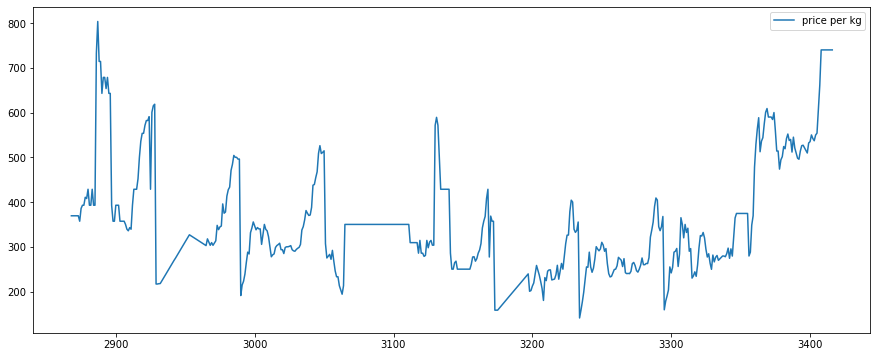

In [29]:
fig, ax = plt.subplots(figsize=(15,6))
rice_DF.plot(ax=ax);

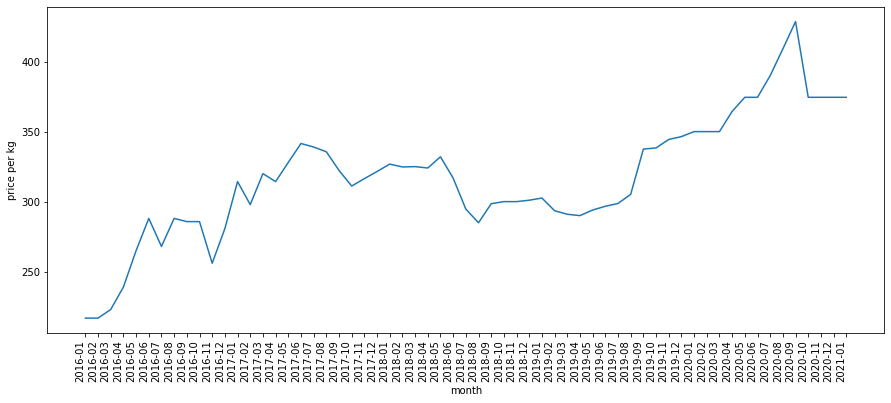

In [30]:
fig, ax = plt.subplots(figsize=(15,6))

trend = rice_df.groupby('month')['price per kg'].median()
trend = trend.reset_index()

sns.lineplot(x='month', y='price per kg', data=trend, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=trend['month'])
ax.set_xticklabels(trend['month'], rotation=90, ha="right")

plt.show()

the above shows the flow of the price from 2016- 2021.

There was a spike in the price sometimes around September 2020

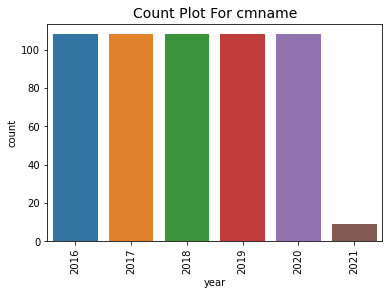

In [31]:
ax = sns.countplot(x="year", data=rice_df);
plt.xticks(rotation=90)
ax.set_title('Count Plot For cmname', fontsize=14)
plt.show()

The above shows the the content of the date series:
same amount froom 2016 - 2020 and few data for 2021

In [32]:
rice_DF.head()

,date,price per kg
2868,2016-01-15,369.285714
2869,2016-02-15,369.285714
2870,2016-03-15,369.285714
2871,2016-04-15,369.285714
2872,2016-05-15,369.285714


In [33]:
# create a df with median prices of each month

def get_median(year):
    DF = pd.DataFrame()
    days = ['01','02','03','04','05','06','07','08','09','10','11','12']
    for day in days:
        month = year+'-'+day
        month_df =rice_df[rice_df['month'] == month].sort_values(by=['price per kg'])
        median_price = month_df['price per kg'].median()
        new_df = pd.DataFrame([{'month': month, 'median_price':median_price}])
        DF=pd.concat([DF, new_df])
    return DF


In [34]:
#get the median value of each year.
rice_2016 = get_median('2016')
rice_2017 = get_median('2017')
rice_2018 = get_median('2018')
rice_2019 = get_median('2019')
rice_2020 = get_median('2020')
rice_2021 = get_median('2021')

Merge the median of each year to make a new dataFrame

In [35]:
final_DF = pd.concat([rice_2016,rice_2017,rice_2018,rice_2019,rice_2020,rice_2021])

In [36]:
final_DF.shape

(72, 2)

In [38]:
# check for misson values
final_DF.isnull().sum()

month            0
median_price    11
dtype: int64

In [39]:
#drop missing values
final_DF.dropna(axis=0, inplace=True)
final_DF.isnull().sum()

month           0
median_price    0
dtype: int64

In [40]:
index = pd.Series([i for i in range(final_DF.shape[0])])
final_DF.set_index(index, inplace=True)
final_DF.head()

,month,median_price
0,2016-01,216.81
1,2016-02,216.81
2,2016-03,222.96
3,2016-04,239.00
4,2016-05,265.00


In [41]:
final_DF['median_price'].describe()

count     61.000000
mean     316.890856
std       43.146914
min      216.810000
25%      293.500000
50%      316.409538
75%      341.500000
max      428.571429
Name: median_price, dtype: float64

In [42]:
final_DF['month'] = pd.to_datetime(final_DF['month'])
final_DF.rename(columns={"month":"date"}, inplace=True)

In [43]:
final_DF.head()

,date,median_price
0,2016-01-01,216.81
1,2016-02-01,216.81
2,2016-03-01,222.96
3,2016-04-01,239.00
4,2016-05-01,265.00


In [44]:
final_DF.shape

(61, 2)

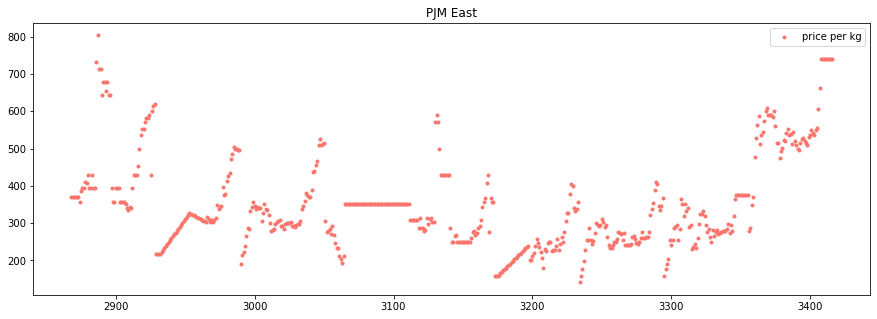

In [44]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = rice_DF.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')

graphical representation of the price distributution

In [46]:
final_DF.head()

,date,median_price
0,2016-01-01,216.81
1,2016-02-01,216.81
2,2016-03-01,222.96
3,2016-04-01,239.00
4,2016-05-01,265.00


split data into training and test sets

In [45]:
split_date = '2020-06-01'
train_data = final_DF.loc[final_DF['date'] <= split_date].copy()
test_data = final_DF.loc[final_DF['date'] > split_date].copy()

In [46]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [47]:
X_train, y_train = create_features(train_data, label='median_price')
X_test, y_test = create_features(test_data, label='median_price')

In [48]:
#initialise the Xgbr model and train the model
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
#with the trained model, make predictions on the test sets
test_data['Prediction'] = reg.predict(X_test)
all_data = pd.concat([test_data, train_data], sort=False)

In [50]:
all_data.head()

,date,median_price,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Prediction
54,2020-07-01,390.000000,0,2,3,7,2020,183,1,27,368.619415
55,2020-08-01,409.080000,0,5,3,8,2020,214,1,31,371.502594
56,2020-09-01,428.571429,0,1,3,9,2020,245,1,36,373.007324
57,2020-10-01,374.500000,0,3,4,10,2020,275,1,40,371.385162
58,2020-11-01,374.500000,0,6,4,11,2020,306,1,44,373.617981


Plot the actual prices and the predicted prices to the how close the values are 
hence how the model is doing

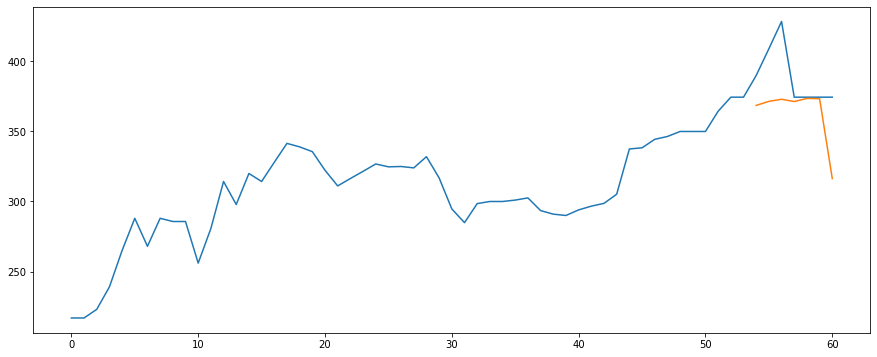

In [51]:

fig, ax = plt.subplots(figsize=(15,6))

_ = final_DF['median_price'].plot()
_ = test_data['Prediction'].plot()

Lets do some statistical evaluation

In [53]:
mean_squared_error(y_true=test_data['median_price'],
                   y_pred=test_data['Prediction'])

1192.5058546149614

In [54]:
mean_absolute_error(y_true=test_data['median_price'],
                   y_pred=test_data['Prediction'])

25.394147650271048

In [55]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [56]:
mean_absolute_percentage_error(y_true=test_data['median_price'],
                   y_pred=test_data['Prediction'])

6.3598128342287925

The mean abosolute error percentage show an error of about 60%

In [57]:
test_data['error'] = test_data['median_price'] - test_data['Prediction']
test_data['abs_error'] = test_data['error'].apply(np.abs)
error_by_day = test_data.groupby(['year','month','dayofmonth']) \
    .mean()[['median_price','Prediction','error','abs_error']]

calculate error and absolute error to see the difference in value

In [59]:
# Over forecasted days
error_by_day.sort_values('error', ascending=True).head(10)

median_price  Prediction      error  abs_error
year month dayofmonth                                                
2020 11    1             374.500000  373.617981   0.882019   0.882019
     12    1             374.500000  373.391418   1.108582   1.108582
     10    1             374.500000  371.385162   3.114838   3.114838
     7     1             390.000000  368.619415  21.380585  21.380585
     8     1             409.080000  371.502594  37.577406  37.577406
     9     1             428.571429  373.007324  55.564104  55.564104
2021 1     1             374.500000  316.368500  58.131500  58.131500

Predict for the next 12 months


In [61]:
# make a dataframe of the next 12 mnths
future = list()
for i in range(2, 13):
    date = '2021-%02d' % i
    future.append([date])
future.append(['2022-01-01'])
future = pd.DataFrame(future)
future.columns = ['date']
future['date'] = pd.to_datetime(future['date'])

In [62]:
#prepare date for training
new_features = create_features(future)

In [63]:
new_features

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,0,1,2,2021,32,1,5
1,0,0,1,3,2021,60,1,9
2,0,3,2,4,2021,91,1,13
3,0,5,2,5,2021,121,1,17
4,0,1,2,6,2021,152,1,22
5,0,3,3,7,2021,182,1,26
6,0,6,3,8,2021,213,1,30
7,0,2,3,9,2021,244,1,35
8,0,4,4,10,2021,274,1,39
9,0,0,4,11,2021,305,1,44


In [64]:
#make predictions on the !@ months data set
new_features['Prediction'] = reg.predict(new_features)
# feature_data = pd.concat([test_data, train_data], sort=False)
new_features['date'] = future['date']

In [107]:
new_features.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Prediction,date
0,0,0,1,2,2021,32,1,5,350.302551,2021-02-01
1,0,0,1,3,2021,60,1,9,349.822784,2021-03-01
2,0,3,2,4,2021,91,1,13,364.073120,2021-04-01
3,0,5,2,5,2021,121,1,17,368.239746,2021-05-01
4,0,1,2,6,2021,152,1,22,375.300415,2021-06-01


create a dataframe with just preiction and date of the new data called 'pred_data'

In [65]:
pred_data = new_features[['Prediction','date']]

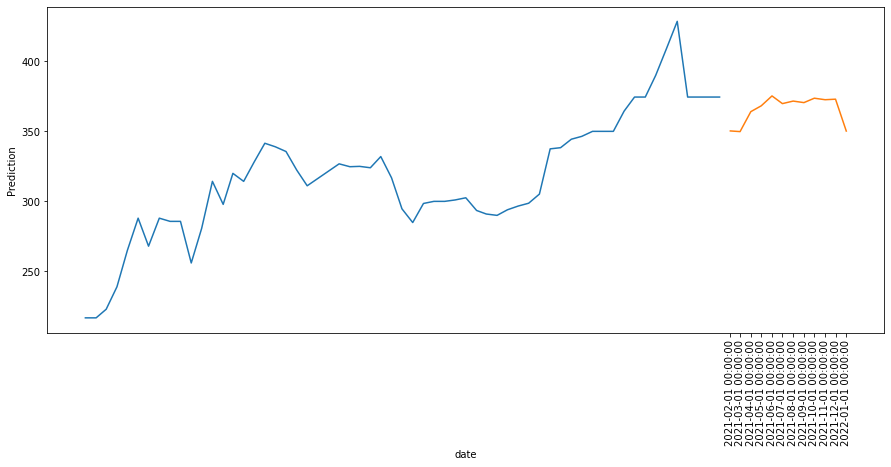

In [66]:
fig, ax = plt.subplots(figsize=(15,6))

sns.lineplot(x='date', y='median_price', data=final_DF, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=final_DF['date'])
ax.set_xticklabels(final_DF['date'], rotation=90)

# trend_ = new_features.groupby('date')['median_price'].median()
# trend_ = trend.reset_index()

sns.lineplot(x='date', y='Prediction', data=pred_data, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=pred_data['date'])
ax.set_xticklabels(pred_data['date'], rotation=90)


plt.show()

The above plot shows the prediciton for the next 12 months

Conclusion: The model definately need to be improved by training more data, but the predicitions made from it are good because it looks like it picked an avarage values of what we've had so far.